Для начала импортируем необходимые библиотеки, импортируем датасет, настраиваем отображение графиков и оцениваем датасет через info и describe

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Загружаем файл с компьютера
uploaded = files.upload()

# Получаем имя загруженного файла
filename = list(uploaded.keys())[0]
print(f"Загружен файл: {filename}")

# Читаем данные
df = pd.read_csv(filename, sep=';')

# Настройка отображения графиков
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

# Оценка датасета через info
print("Информация о датасете:")
print(df.info())
print("\n" + "="*50 + "\n")

# Оценка датасета через describe
print("Описательная статистика числовых колонок:")
print(df.describe())
print("\n" + "="*50 + "\n")

print("Описательная статистика категориальных колонок:")
print(df.describe(include=['object']))
print("\n" + "="*50 + "\n")

# Стандартизация датасета
df_clean = df.copy()

# Преобразуем числовые колонки
numeric_columns = ['Year_Birth', 'Income', 'Kidhome', 'NumDealsPurchases']
for col in numeric_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Преобразуем дату
if 'Dt_Customer' in df_clean.columns:
    df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d.%m.%Y', errors='coerce')

# Стандартизируем текстовые колонки
if 'Education' in df_clean.columns:
    df_clean['Education'] = df_clean['Education'].str.title()

if 'Marital_Status' in df_clean.columns:
    df_clean['Marital_Status'] = df_clean['Marital_Status'].str.title()

print("После стандартизации:")
print(df_clean.info())
print("\nПервые 5 строк после обработки:")
print(df_clean.head())

Saving salary2.csv to salary2.csv
Загружен файл: salary2.csv
Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           401 non-null    float64
 1   employment_type     401 non-null    object 
 2   job_title           401 non-null    object 
 3   salary              398 non-null    float64
 4   salary_in_usd       401 non-null    float64
 5   employee_residence  401 non-null    object 
 6   company_location    401 non-null    object 
 7   company_size        401 non-null    object 
 8   exp_all             401 non-null    int64  
 9   exp                 401 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 31.5+ KB
None


Описательная статистика числовых колонок:
         work_year        salary  salary_in_usd     exp_all         exp
count   401.000000  3.980000e+02     40

**Матрица** **диаграмм** **рассеяния**

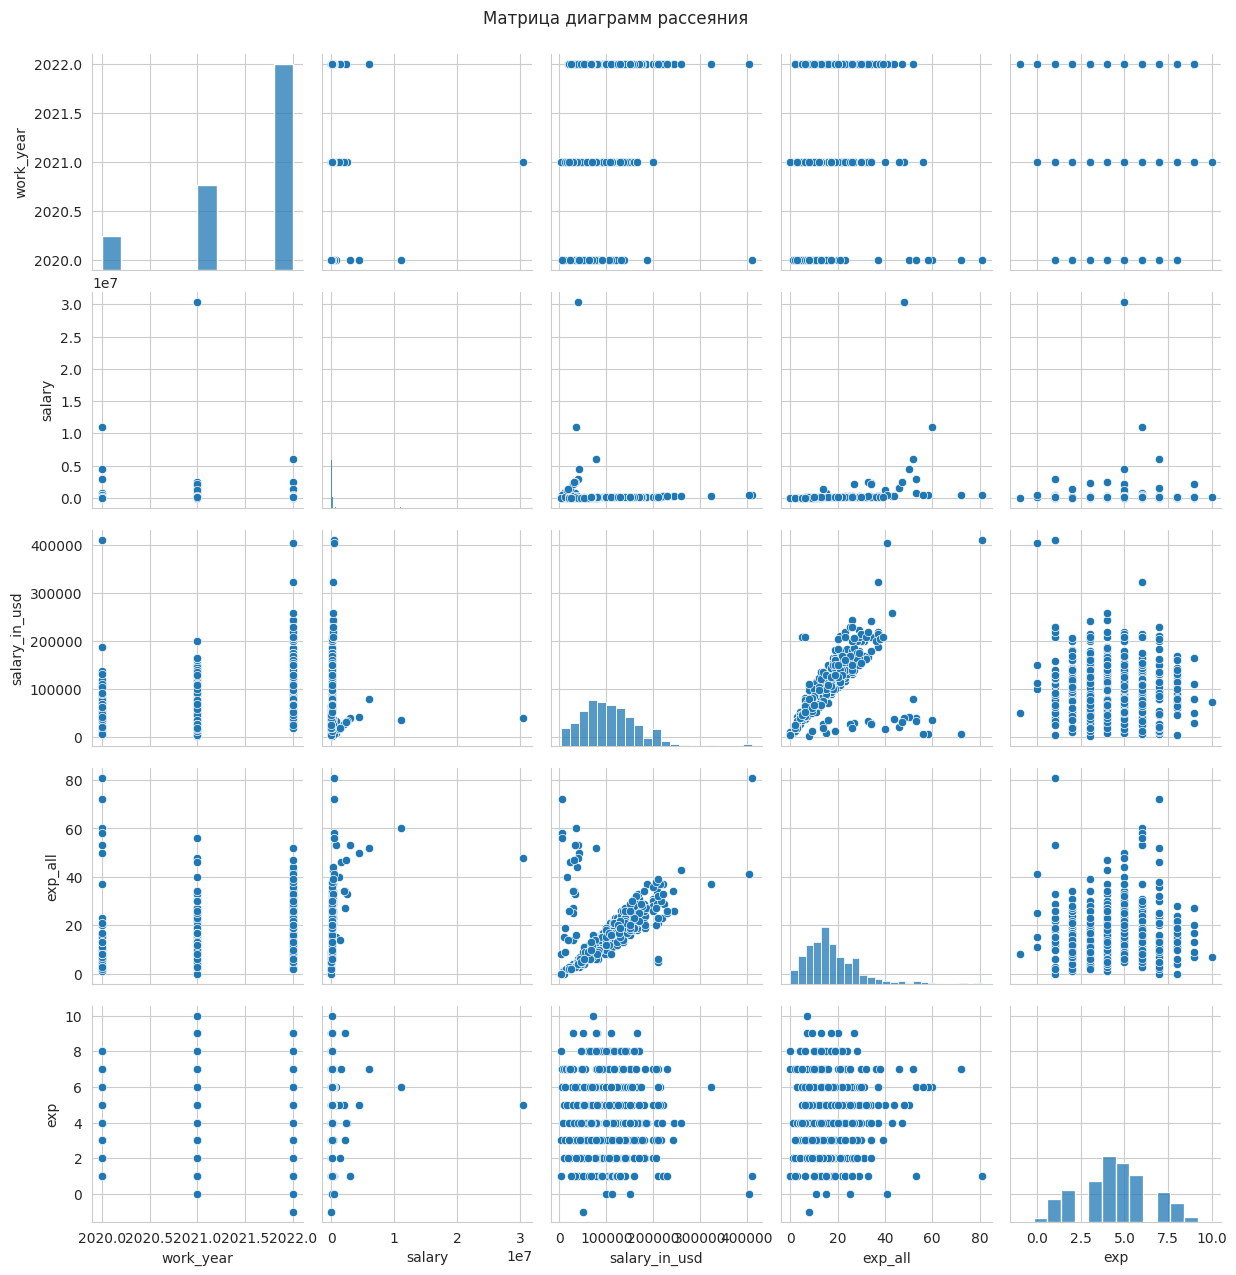

In [4]:

# Строим матрицу диаграмм рассеяния для числовых столбцов
sns.pairplot(df_clean.select_dtypes(include=[np.number]))
plt.suptitle('Матрица диаграмм рассеяния', y=1.02)
plt.show()

Эта диаграмма показала, что существует прямая связь между опытом работы и уровнем зарплаты — чем больше общий и профессиональный опыт, тем выше доход. Это видно по диагональному расположению точек на графиках «опыт – зарплата в долларах», где с ростом опыта значения зарплаты увеличиваются.
Также видно, что с каждым годом средний уровень зарплат растёт — на графиках «год работы – зарплата» точки, относящиеся к более поздним годам (2021–2022), располагаются выше, чем за предыдущие периоды.
Опыт в конкретной сфере тесно связан с общим опытом — точки на диаграмме образуют почти прямую линию, что говорит о сильной зависимости между этими показателями.
Большинство сотрудников имеют от 3 до 7 лет опыта — на гистограмме видно, что основная часть данных сосредоточена именно в этом диапазоне.

**Вывод**: главные факторы, влияющие на уровень зарплаты, — это опыт работы и год. С увеличением опыта и с течением времени доход сотрудников растёт, что отражает общую тенденцию повышения зарплат на рынке труда.

**Диаграмма** **рассеяния** **по** **категориям**


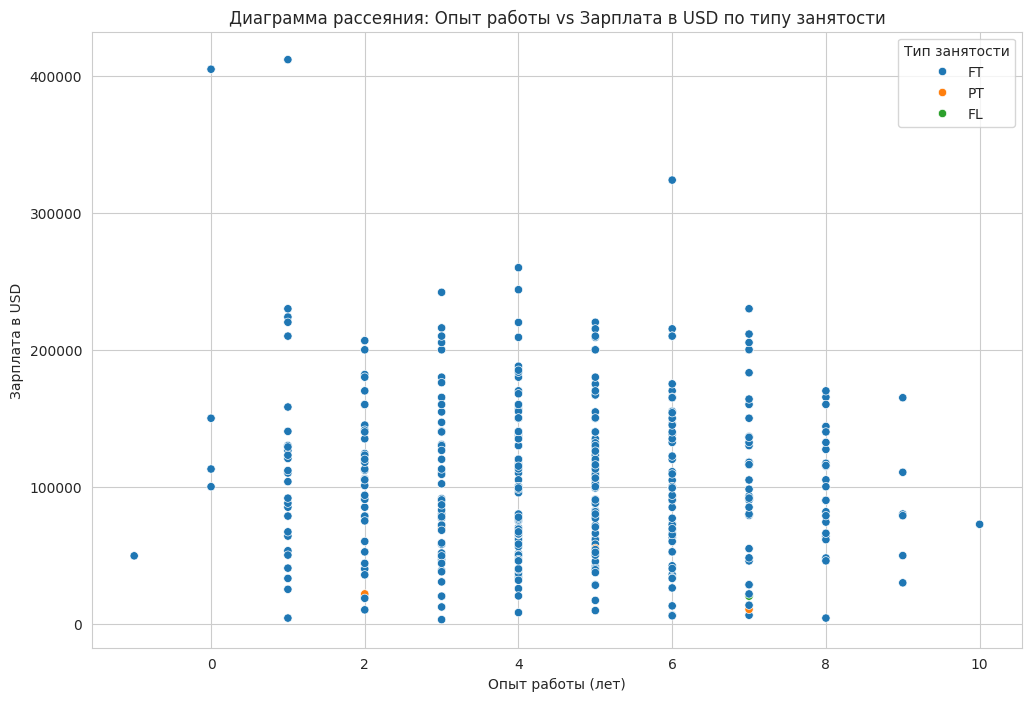

In [5]:
# Диаграмма с опытом работы
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='exp', y='salary_in_usd', hue='employment_type')
plt.title('Диаграмма рассеяния: Опыт работы vs Зарплата в USD по типу занятости')
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Зарплата в USD')
plt.legend(title='Тип занятости')
plt.show()

На диаграмме рассеяния показана зависимость опыта работы (в годах) и зарплаты (в USD), разделённая по типу занятости.
Видно, что подавляющее большинство точек относится к типу FT (Full Time — полная занятость), обозначенных синим цветом. Сотрудники с полной занятостью представлены во всех диапазонах опыта и зарплат. Их доходы варьируются от около 50 000 до 400 000 долларов, причём значительное количество наблюдений сосредоточено в области от 80 000 до 150 000 долларов.
Типы занятости PT (Part Time — неполная занятость) и FL (Freelance — фриланс) встречаются гораздо реже (оранжевые и зелёные точки). Их зарплаты в основном ниже — не превышают 150 000 долларов, и такие сотрудники встречаются преимущественно среди работников с опытом до 5 лет.
Заметной зависимости между опытом и зарплатой нет — даже специалисты с большим опытом (6–10 лет) часто имеют зарплату в среднем диапазоне.

**Вывод**: основной тип занятости в сфере данных — полная занятость (FT), и именно она обеспечивает самые высокие доходы. Неполная занятость и фриланс встречаются редко и приносят меньший заработок. Зависимость между опытом и уровнем зарплаты выражена слабо: ключевую роль играет не стаж, а форма занятости и, вероятно, должность.

**Гистограммы** **для** **числовых** **признаков**


Числовые столбцы: ['work_year', 'salary', 'salary_in_usd', 'exp_all', 'exp']


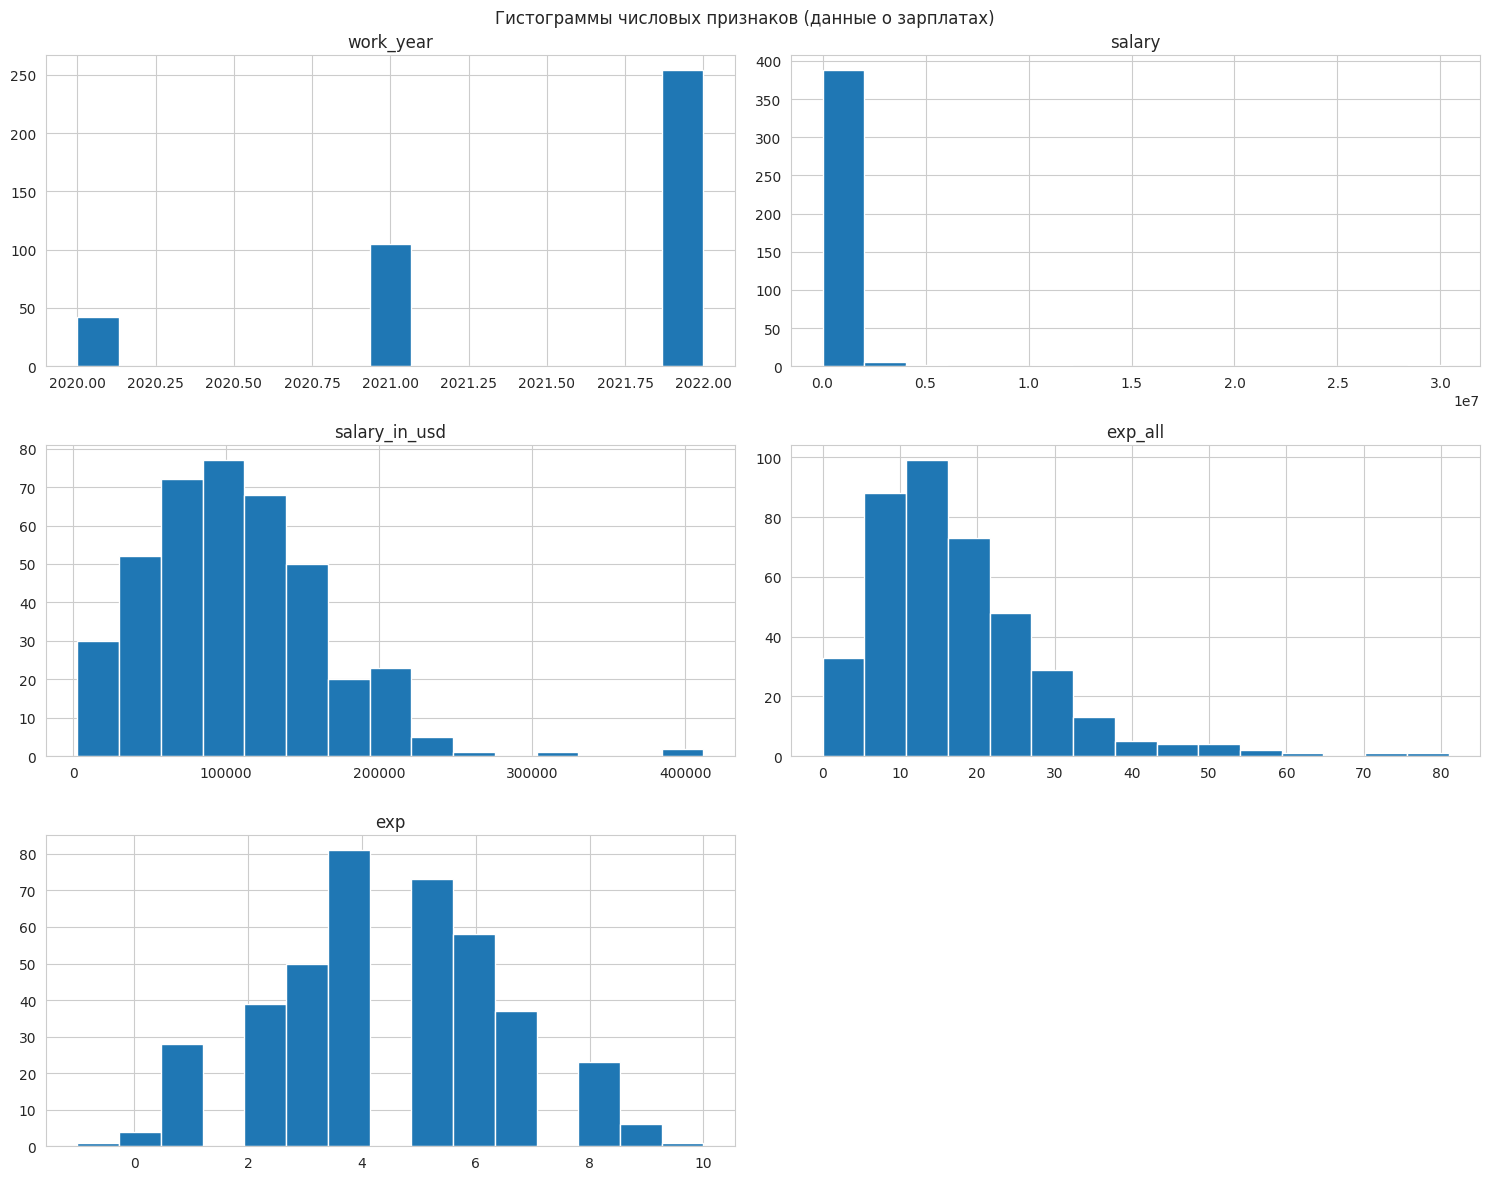

In [6]:
# Выбираем числовые столбцы
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"\nЧисловые столбцы: {numeric_columns.tolist()}")

# Строим гистограммы для каждого числового признака
df[numeric_columns].hist(bins=15, figsize=(15, 12))
plt.suptitle('Гистограммы числовых признаков (данные о зарплатах)')
plt.tight_layout()
plt.show()

Гистограммы показывают распределение ключевых числовых признаков, связанных с зарплатами и опытом сотрудников.
Гистограмма work_year показывает, что большинство данных приходится на 2022 год, немного меньше — на 2021, и совсем мало — на 2020. Это говорит о том, что больше всего записей в базе относится к последним годам, когда активнее собиралась информация.
Гистограмма salary имеет высокий столбец в начале шкалы, что означает — большинство зарплат сосредоточено в нижнем диапазоне, а очень высокие значения встречаются редко.
Распределение salary_in_usd показывает, что чаще всего зарплаты находятся в диапазоне от 50 000 до 150 000 долларов в год. При этом очень маленькие и очень большие зарплаты встречаются редко, что создаёт форму “колокола” с пиком в среднем диапазоне.
На гистограмме exp_all видно, что у большинства сотрудников общий опыт находится в пределах 10–20 лет. Людей с опытом больше 40 лет значительно меньше.
Гистограмма exp показывает, что чаще всего сотрудники имеют от 3 до 6 лет опыта в своей текущей сфере. Очень мало тех, кто только начинает (0–1 год) или имеет более 8 лет.

**Вывод**: большинство сотрудников имеют 3–6 лет опыта в своей области и 10–20 лет общего опыта, при этом зарабатывают от 50 000 до 150 000 долларов в год. Основная часть данных относится к 2021–2022 годам, что отражает современное состояние рынка труда.

**Тепловая** **карта** **корреляций**

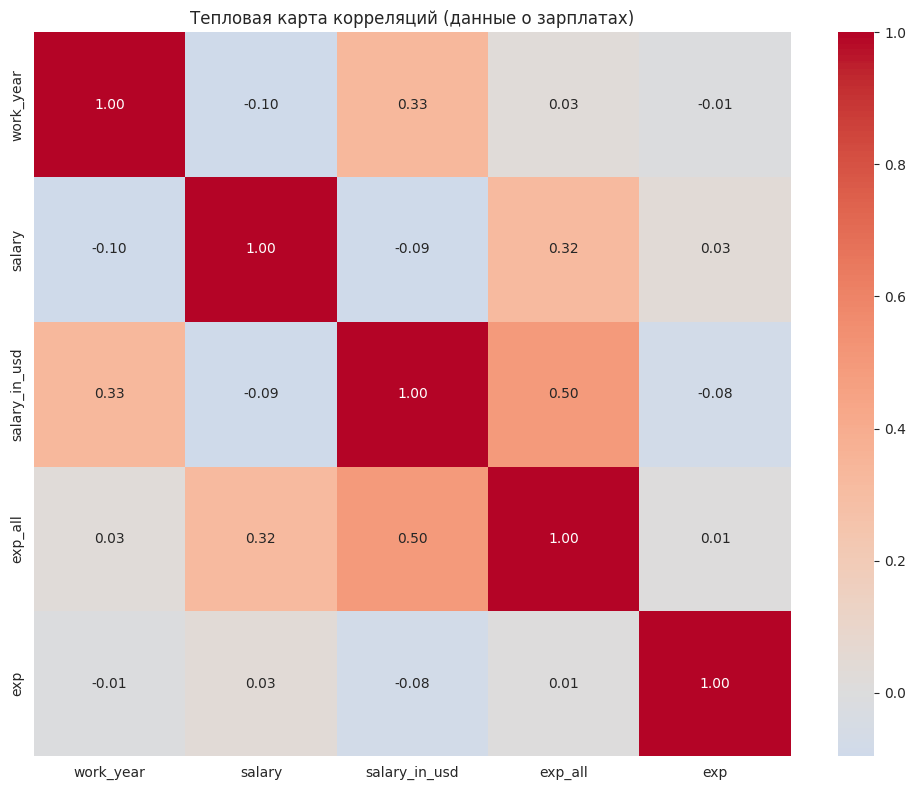

In [7]:
# Вычисляем матрицу корреляций для числовых столбцов
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Тепловая карта корреляций (данные о зарплатах)')
plt.tight_layout()
plt.show()

На тепловой карте корреляций видно, что между большинством переменных нет сильной линейной зависимости — большинство коэффициентов корреляции близки к нулю.
Наиболее заметная связь наблюдается между общим опытом (exp_all) и зарплатой в долларах (salary_in_usd)— коэффициент 0.50. Это означает умеренную положительную корреляцию: чем больше общий опыт сотрудника, тем выше его зарплата. Также есть слабая положительная связь между годом работы (work_year) и зарплатой в долларах (0.33), что может указывать на рост зарплат в более поздние годы.
Связь между salary и другими показателями выражена слабо: с общим опытом корреляция 0.32, а с годом — отрицательная (-0.10). Это говорит о том, что «salary» без пересчёта в доллары может быть менее показательной метрикой из-за разных валют.
Опыт в сфере (exp) почти не связан с другими переменными — все значения корреляции близки к нулю.

**Вывод**: в данных нет сильных линейных зависимостей между переменными. Умеренная положительная связь наблюдается только между опытом и зарплатой в долларах, а также между годом и зарплатой. Это значит, что на уровень дохода больше всего влияют профессиональный опыт и временной фактор (год).

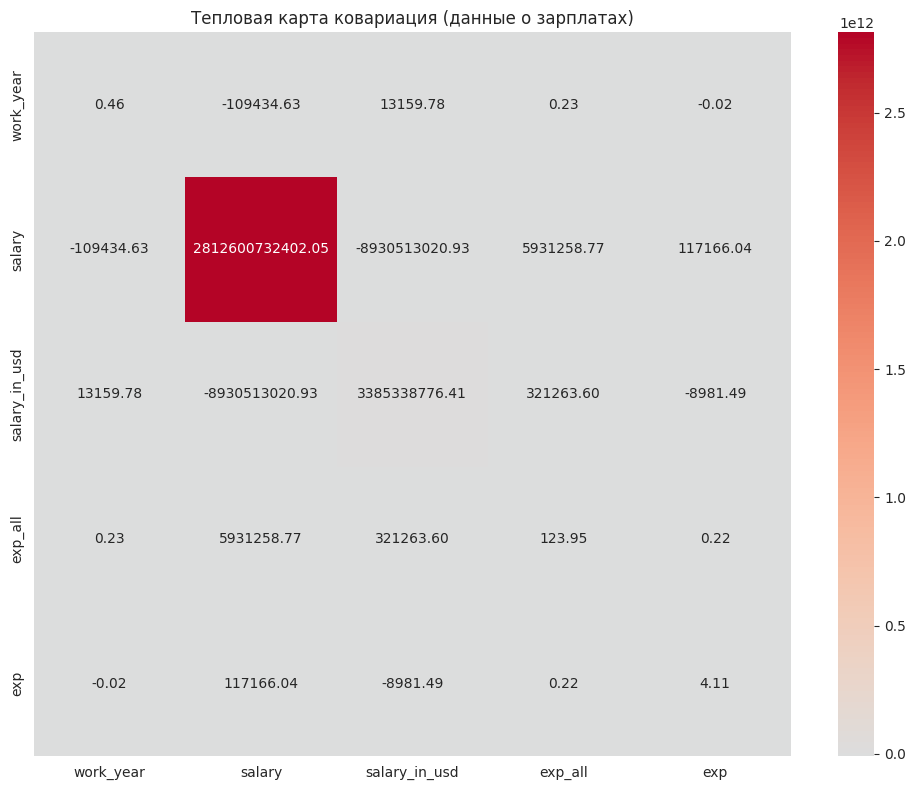

In [8]:
# Вычисляем матрицу корреляций для числовых столбцов
correlation_matrix = df.select_dtypes(include=[np.number]).cov()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Тепловая карта ковариация (данные о зарплатах)')
plt.tight_layout()
plt.show()

***Задания по варианту!***

Задание 1. Использовать seaborn. По группировке - work_year и количество
компаний каждого размера построить диаграмму следующего вида:

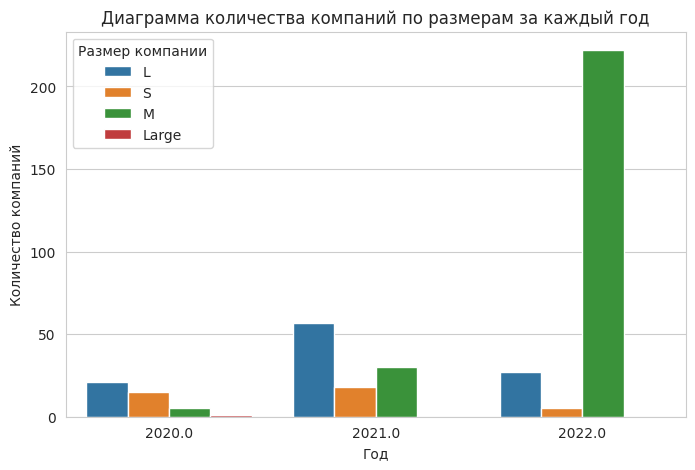

In [9]:
# === Задание 1 ===
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="work_year", hue="company_size")
plt.title("Диаграмма количества компаний по размерам за каждый год")
plt.xlabel("Год")
plt.ylabel("Количество компаний")
plt.legend(title="Размер компании")
plt.show()

На диаграмме видно распределение компаний по их размеру за разные годы.
В 2020 году количество компаний всех размеров было примерно одинаковым, с небольшим преимуществом компаний среднего размера (M). В 2021 году общее количество компаний выросло, особенно среди крупных (L) и средних (M) компаний.
Наибольшие изменения произошли в 2022 году — резко увеличилось количество крупных компаний (Large), их стало больше 200, тогда как число компаний остальных размеров (S, M, L) осталось примерно на уровне предыдущих лет или немного уменьшилось.
Это показывает, что с каждым годом происходит укрупнение бизнеса: количество больших компаний растёт, а малых и средних — сокращается.

**Вывод**: в последние годы наблюдается тенденция к росту числа крупных компаний, особенно в 2022 году. Это может говорить о консолидации рынка и усилении позиций крупных игроков.

Задание 2. Использовать pandas и plot. По сводной таблице (pivot_table) -
отобразить среднюю зарплату в usd по должностям (job_title). Сделать линию
красной, шириной 6 и отобразить маркеры в виде красной точки.

<Figure size 1000x600 with 0 Axes>

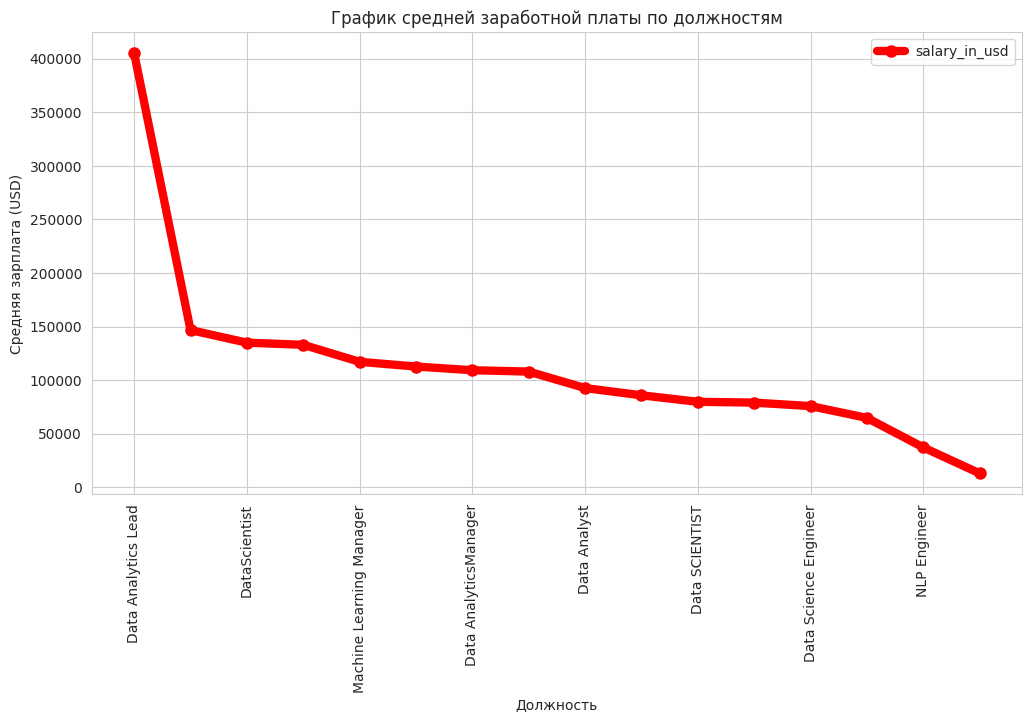

In [16]:
# Создаём сводную таблицу: средняя зарплата по должностям
pivot = (
    df.pivot_table(values="salary_in_usd", index="job_title", aggfunc="mean")
      .sort_values(by="salary_in_usd", ascending=False)
)

# Строим график с помощью встроенного plot из pandas
plt.figure(figsize=(10,6))
pivot.plot(
    y="salary_in_usd",
    color="red",        # красная линия
    linewidth=6,        # ширина 6
    marker="o",         # маркеры — кружки
    markersize=8,       # размер маркеров
    legend=True,        # показывать легенду
    grid=True           # показывать сетку
)
plt.title("График средней заработной платы по должностям")
plt.xlabel("Должность")
plt.ylabel("Средняя зарплата (USD)")
plt.xticks(rotation=90)
plt.legend(["salary_in_usd"])
plt.show()

На графике видно, как различаются средние зарплаты по должностям в сфере анализа данных и машинного обучения.
Самую высокую среднюю заработную плату получают специалисты на позиции Data Analytics Lead — около 400 000 долларов в год. Следом идут Head of Data Science и Data Scientists, чьи зарплаты также остаются высокими, но значительно ниже лидеров — примерно от 120 000 до 150 000 долларов.
Далее наблюдается постепенное снижение дохода по мере уменьшения уровня должности. Средние зарплаты для Data Analyst, Machine Learning Developer и Data Science Engineer находятся в диапазоне от 70 000 до 100 000 долларов.
Самые низкие средние доходы отмечаются у позиций NLP Engineer и Product Data Analyst — менее 50 000 долларов в год.

**Вывод**: чем выше уровень управленческой ответственности и стратегического участия в проектах, тем выше средняя заработная плата. Лидеры направлений и руководители аналитики зарабатывают значительно больше, чем специалисты технических и вспомогательных ролей.


Задание 3. Использовать matplotlib. Построить круговую диаграмму, которая
отображает процент компаний каждого размера.

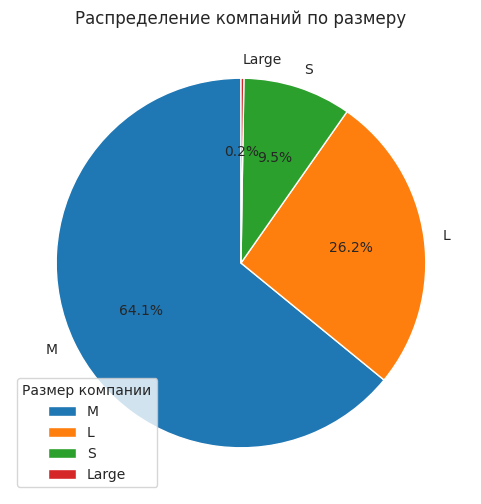

In [11]:
# Считаем количество компаний каждого размера
company_counts = df["company_size"].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(6,6))
plt.pie(
    company_counts,
    labels=company_counts.index,
    autopct="%.1f%%",    # отображаем проценты
    startangle=90        # поворот для красоты
)
plt.title("Распределение компаний по размеру")
plt.legend(title="Размер компании")
plt.show()

На диаграмме показано распределение компаний по размеру.
Самая большая группа — это компании среднего размера (M), которые составляют 64.1% от общего числа. Это означает, что большинство организаций находятся в категории среднего бизнеса.
На втором месте — крупные компании (L), их 26.2%. Они занимают значительную, но заметно меньшую долю по сравнению со средними.
Небольших компаний (S) значительно меньше — всего 9.5%, а очень крупных компаний (Large) почти нет — лишь 0.2%.

**Вывод**: основную часть рынка составляют компании среднего размера, за ними следуют крупные, а малых и особенно очень больших компаний существенно меньше. Это говорит о преобладании среднего бизнеса в выборке.


Выполните минимум один любой график типа hexagonal binning plot. Сделайте
выводы.

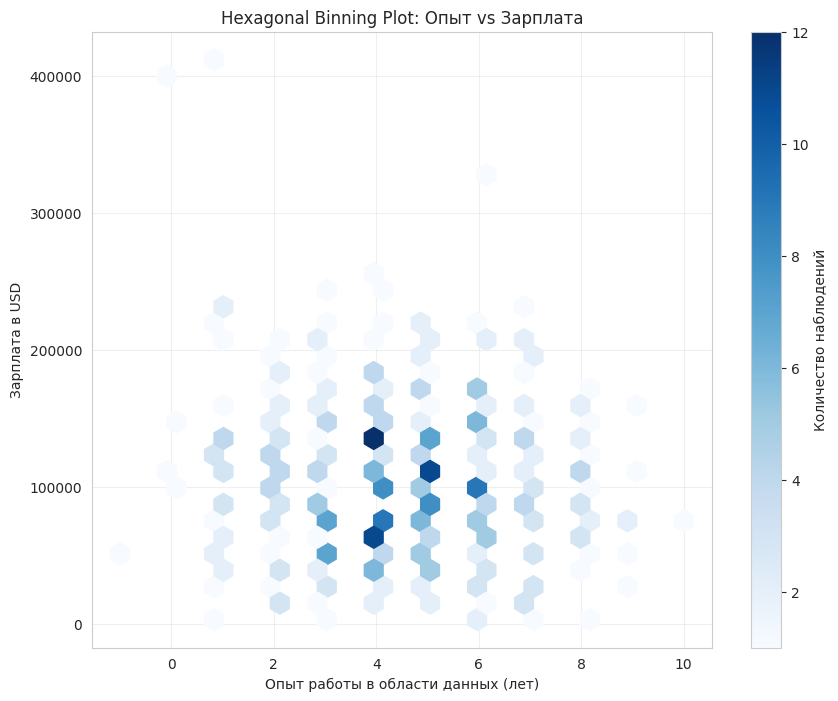

In [12]:
# 1. Hexagonal binning plot
plt.figure(figsize=(10, 8))
plt.hexbin(df['exp'], df['salary_in_usd'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Количество наблюдений')
plt.xlabel('Опыт работы в области данных (лет)')
plt.ylabel('Зарплата в USD')
plt.title('Hexagonal Binning Plot: Опыт vs Зарплата')
plt.grid(alpha=0.3)
plt.show()



На диаграмме hexagonal binning показано распределение сотрудников по опыту работы в области данных и уровню зарплаты. Чем темнее ячейки, тем больше наблюдений в этой зоне.
Основная концентрация точек находится в диапазоне опыта 3–6 лет и зарплаты 80 000–150 000 долларов в год— именно здесь наблюдается наибольшая плотность (тёмно-синие шестиугольники).
Меньше сотрудников с опытом меньше 2 лет и выше 8 лет — эти зоны окрашены светлее, что говорит о меньшем количестве наблюдений. Также крайне мало специалистов с очень высокими зарплатами (выше 200 000 долларов) независимо от опыта.

**Вывод**: большинство специалистов в области данных зарабатывают от 80 000 до 150 000 долларов и имеют 3–6 лет опыта работы. Высокие зарплаты встречаются редко и, как правило, не сильно зависят от стажа — значительная часть сотрудников с любым опытом сосредоточена в среднем диапазоне доходов.

Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.

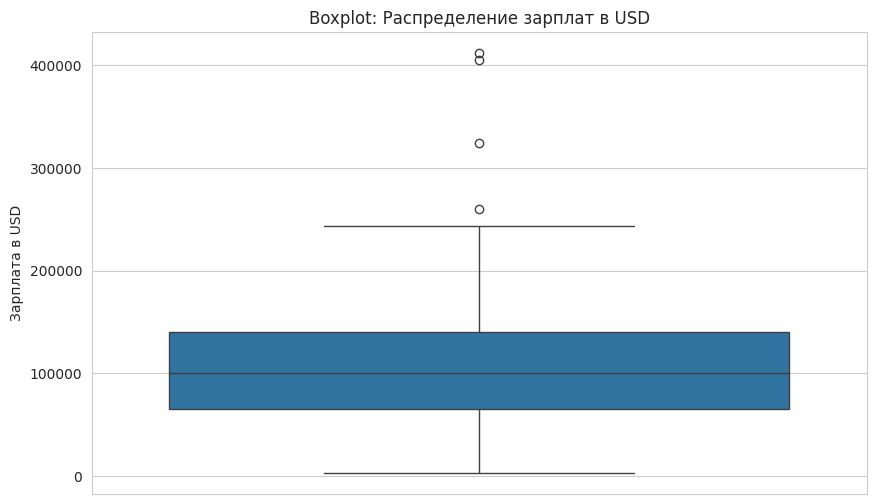

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['salary_in_usd'])
plt.title('Boxplot: Распределение зарплат в USD')
plt.ylabel('Зарплата в USD')
plt.show()


Boxplot показывает распределение зарплат в долларах США.
Основная часть значений находится в диапазоне от 75 000 до 130 000 долларов в год — это границы «ящика». Средняя зарплата (линия внутри прямоугольника) составляет примерно около 100 000 долларов, что отражает типичный уровень дохода большинства сотрудников.
Разброс зарплат достаточно широкий: минимальные значения начинаются около 0 долларов, а максимальные доходят до примерно 250 000 долларов.
Выше основной части графика видны несколько отдельных точек — это выбросы, соответствующие очень высоким зарплатам, которые превышают 300 000–400 000 долларов. Таких сотрудников немного, но они заметно выделяются по уровню дохода.

**Вывод**: большинство сотрудников зарабатывают около 100 000 долларов в год, однако есть отдельные специалисты с значительно более высокими зарплатами, что указывает на неравномерное распределение доходов в выборке.


Добавьте категорию по любому числовому столбцу (например, уровень зарплаты -
высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой
новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).

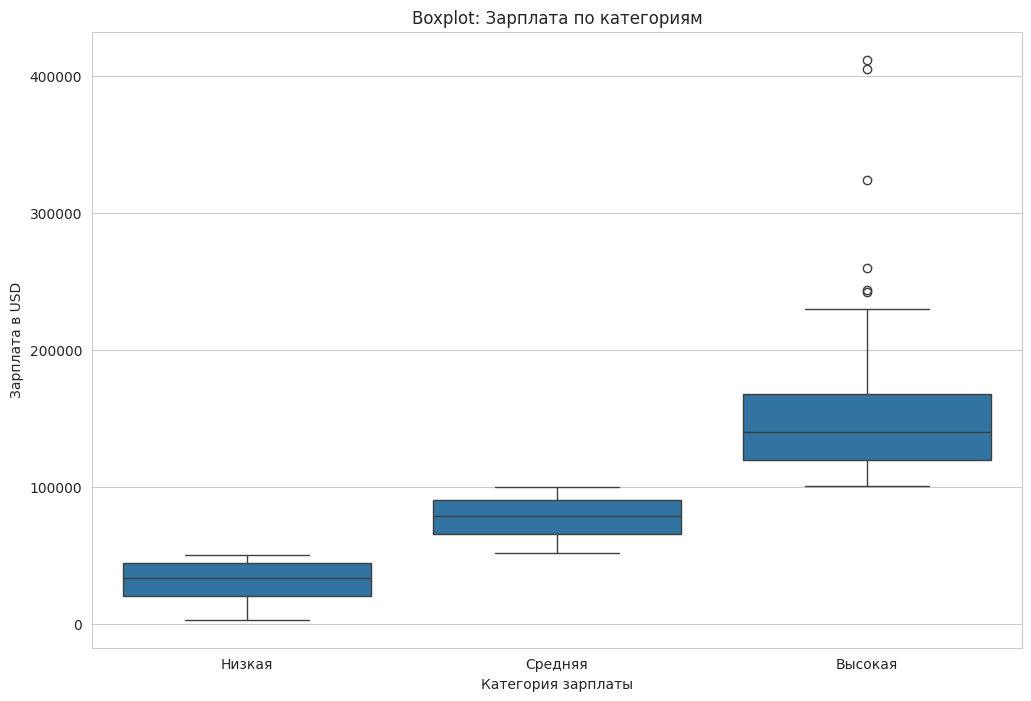

In [14]:
df['salary_category'] = pd.cut(df['salary_in_usd'],
                              bins=[0, 50000, 100000, float('inf')],
                              labels=['Низкая', 'Средняя', 'Высокая'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='salary_category', y='salary_in_usd')
plt.title('Boxplot: Зарплата по категориям')
plt.xlabel('Категория зарплаты')
plt.ylabel('Зарплата в USD')
plt.show()

На диаграмме boxplot показано распределение зарплат по трём категориям: низкая, средняя и высокая.
В группе с низкой зарплатой диапазон значений относительно узкий — большинство сотрудников зарабатывают от примерно 10 000 до 50 000 долларов. Разброс небольшой, что говорит о близких уровнях доходов внутри категории.
У категории средняя зарплата диапазон шире — от 60 000 до 100 000 долларов, медиана находится примерно посередине. Это означает, что в данной группе больше разнообразия по уровню доходов.
Категория высокая зарплата показывает самый большой разброс — значения варьируются от 100 000 до 200 000 долларов, а также присутствуют несколько выбросов (точки выше основной коробки), где зарплаты превышают 300 000–400 000 долларов.

**Вывод**: категории зарплат чётко разделены — с ростом категории увеличиваются и средние значения, и диапазон доходов. Наибольшие различия и наличие высоких выбросов наблюдаются в группе с высокими зарплатами, что указывает на значительную неоднородность внутри этой категории.

Выполните ещё минимум 2 графика boxplot по другим категориям (например,
зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для
каждой категории на ном графике). Используйте для построения графиков разные
библиотеки (минимум 2). Сделайте вывод.

/tmp/ipython-input-3227731919.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(employment_data, labels=main_employment_types)


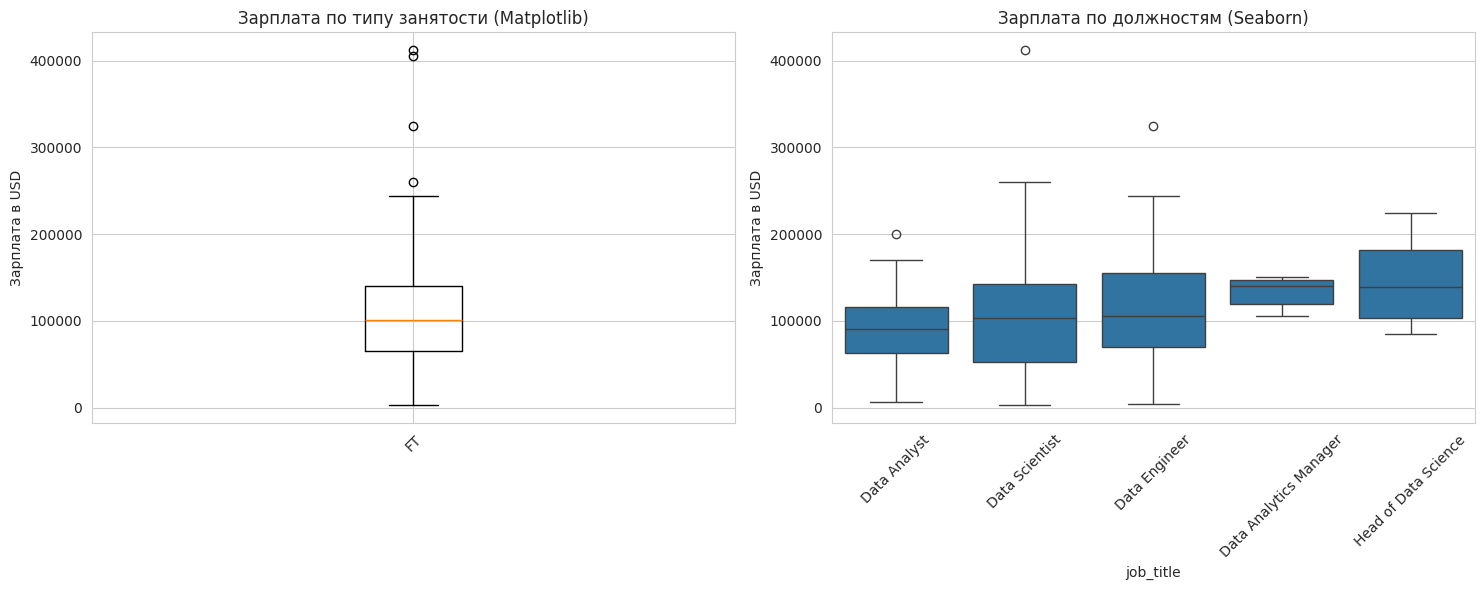

In [15]:
# Boxplot 1: Зарплата по типам занятости (matplotlib)
employment_counts = df['employment_type'].value_counts()
main_employment_types = employment_counts[employment_counts > 10].index
df_filtered = df[df['employment_type'].isin(main_employment_types)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Matplotlib boxplot
employment_data = [df_filtered[df_filtered['employment_type'] == emp_type]['salary_in_usd']
                  for emp_type in main_employment_types]
ax1.boxplot(employment_data, labels=main_employment_types)
ax1.set_title('Зарплата по типу занятости (Matplotlib)')
ax1.set_ylabel('Зарплата в USD')
ax1.tick_params(axis='x', rotation=45)

# Boxplot 2: Зарплата по основным должностям (seaborn)
top_jobs = df['job_title'].value_counts().head(5).index
df_top_jobs = df[df['job_title'].isin(top_jobs)]

sns.boxplot(data=df_top_jobs, x='job_title', y='salary_in_usd', ax=ax2)
ax2.set_title('Зарплата по должностям (Seaborn)')
ax2.set_ylabel('Зарплата в USD')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Первый график (слева) показывает распределение зарплаты по типу занятости (FT — полный рабочий день). Видно, что основная масса сотрудников с полной занятостью получает зарплату в диапазоне от 75 000 до 130 000 долларов, медианное значение составляет около 100 000 долларов. При этом наблюдаются несколько выбросов— отдельные сотрудники с очень высокими доходами, превышающими 300 000–400 000 долларов. Это говорит о том, что в категории полной занятости встречаются как типичные зарплаты, так и редкие случаи очень высоких доходов.
Второй график (справа) отражает распределение зарплат по должностям. Наибольшие медианные зарплаты наблюдаются у Head of Data Science и Data Analytics Manager — их уровни дохода значительно выше среднего. Далее идут Data Engineer и Data Scientist, которые имеют умеренно высокие зарплаты, но с большим разбросом. Самые низкие зарплаты — у Data Analyst, что подтверждает, что аналитические роли начального уровня оплачиваются меньше. Также заметно, что должности уровня руководства имеют меньший разброс, что говорит о более стабильных зарплатах в верхнем сегменте.

**Вывод**: тип занятости и должность существенно влияют на уровень дохода. Сотрудники с полной занятостью зарабатывают стабильно, но среди них встречаются редкие случаи очень высоких зарплат. По должностям наибольшие доходы характерны для руководителей и специалистов высокого уровня, в то время как начальные аналитические позиции получают значительно меньше.

**Вывод**
В ходе работы были изучены методы визуализации данных о зарплатах специалистов. С помощью 11 различных графиков проанализированы взаимосвязи между признаками рынка труда в data-сфере.

Было установлено, что должность сильно влияет на доход - руководители (Head of Data Science, Data Analytics Lead) зарабатывают значительно больше, чем специалисты начального уровня. Опыт работы также связан с зарплатой - сотрудники с большим стажем обычно получают больше, однако зависимость не является строгой.

Тип занятости определяет уровень дохода - полная занятость обеспечивает самые высокие заработки, в то время как частичная занятость и фриланс приносят значительно меньше. Размер компании влияет на представленность на рынке - средние компании составляют большинство, но крупные компании активно растут.

Наибольшая концентрация специалистов приходится на опыт 3-6 лет со средними зарплатами 80,000-150,000 USD. Связи между большинством переменных умеренные, кроме зависимости дохода от должности и типа занятости.

Освоены основные типы визуализации: scatter plot, гистограммы, heatmap, boxplot, hexagonal binning, круговые и столбчатые диаграммы. Получены навыки анализа графиков и выявления закономерностей в данных. Работа показала, что рынок труда в data-сфере характеризуется значительным разбросом зарплат с четкой зависимостью от должности и формы занятости.